## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

# Epochs = 500

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9261 - acc: 0.3067 - val_loss: 1.7488 - val_acc: 0.3808
Epoch 2/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.7087 - acc: 0.3889 - val_loss: 1.6389 - val_acc: 0.4152
Epoch 3/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.6231 - acc: 0.4201 - val_loss: 1.6052 - val_acc: 0.4263
Epoch 4/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.5552 - acc: 0.4459 - val_loss: 1.5570 - val_acc: 0.4460
Epoch 5/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.5007 - acc: 0.4646 - val_loss: 1.5427 - val_acc: 0.4447
Epoch 6/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.4637 - acc: 0.4805 - val_loss: 1.5108 - val_acc: 0.4610
Epoch 7/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.4335 - acc: 0.4892 - val_loss: 1

50000/50000 [==============================] - 5s 102us/step - loss: 0.2327 - acc: 0.9171 - val_loss: 3.3856 - val_acc: 0.4993
Epoch 118/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2804 - acc: 0.8997 - val_loss: 3.3304 - val_acc: 0.4918
Epoch 119/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2257 - acc: 0.9189 - val_loss: 3.4453 - val_acc: 0.5019
Epoch 120/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2212 - acc: 0.9203 - val_loss: 3.4305 - val_acc: 0.5017
Epoch 121/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2004 - acc: 0.9282 - val_loss: 3.4347 - val_acc: 0.5019
Epoch 122/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2564 - acc: 0.9071 - val_loss: 3.4348 - val_acc: 0.4984
Epoch 123/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2412 - acc: 0.9125 - val_loss: 3.5001 - val_acc: 0.5001
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 100us/step - loss: 0.3412 - acc: 0.8988 - val_loss: 4.5141 - val_acc: 0.4918
Epoch 234/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.1375 - acc: 0.9532 - val_loss: 4.5472 - val_acc: 0.4959
Epoch 235/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.1164 - acc: 0.9593 - val_loss: 4.6100 - val_acc: 0.4878
Epoch 236/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0683 - acc: 0.9772 - val_loss: 4.5771 - val_acc: 0.5008
Epoch 237/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0504 - acc: 0.9835 - val_loss: 4.6142 - val_acc: 0.5046
Epoch 238/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0941 - acc: 0.9684 - val_loss: 4.8406 - val_acc: 0.4854
Epoch 239/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1952 - acc: 0.9352 - val_loss: 4.7192 - val_acc: 0.4964
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 0.0314 - acc: 0.9894 - val_loss: 5.1324 - val_acc: 0.4974
Epoch 350/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2347 - acc: 0.9358 - val_loss: 5.1828 - val_acc: 0.4728
Epoch 351/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2968 - acc: 0.9168 - val_loss: 4.9362 - val_acc: 0.4974
Epoch 352/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0836 - acc: 0.9720 - val_loss: 5.0276 - val_acc: 0.4896
Epoch 353/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0352 - acc: 0.9881 - val_loss: 5.0186 - val_acc: 0.5021
Epoch 354/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0143 - acc: 0.9963 - val_loss: 5.0441 - val_acc: 0.5014
Epoch 355/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0108 - acc: 0.9976 - val_loss: 5.0673 - val_acc: 0.4988
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 0.0100 - acc: 0.9984 - val_loss: 4.7697 - val_acc: 0.5044
Epoch 466/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0060 - acc: 0.9995 - val_loss: 4.8014 - val_acc: 0.5075
Epoch 467/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0042 - acc: 0.9998 - val_loss: 4.8299 - val_acc: 0.5026
Epoch 468/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0035 - acc: 0.9999 - val_loss: 4.8604 - val_acc: 0.5047
Epoch 469/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.8840 - val_acc: 0.5070
Epoch 470/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 4.8916 - val_acc: 0.5041
Epoch 471/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.5039 - acc: 0.8854 - val_loss: 4.3685 - val_acc: 0.4857
Epoch 472/500
50000/50000 [

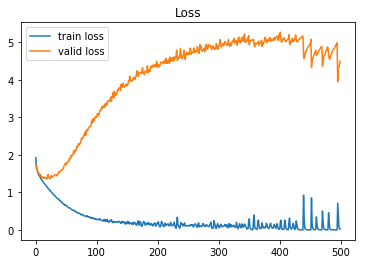

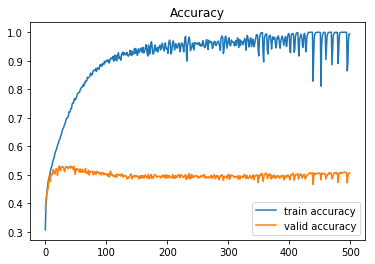

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

#train_loss = model.history.history["loss"]
#valid_loss = model.history.history["val_loss"]

#train_acc = model.history.history["acc"]
#valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Optimizer = SGD

In [11]:
"""
Compile 模型
"""
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
#model.summary()

optimizer = keras.optimizers.SGD(lr=0.01)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
"""
設定要訓練的 Epoch 數
"""
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.0799 - acc: 0.2564 - val_loss: 1.9735 - val_acc: 0.2868
Epoch 2/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.8892 - acc: 0.3333 - val_loss: 1.8446 - val_acc: 0.3503
Epoch 3/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.8164 - acc: 0.3622 - val_loss: 1.8336 - val_acc: 0.3394
Epoch 4/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.7655 - acc: 0.3779 - val_loss: 1.7520 - val_acc: 0.3719
Epoch 5/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.7297 - acc: 0.3923 - val_loss: 1.7852 - val_acc: 0.3571
Epoch 6/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.6999 - acc: 0.4017 - val_loss: 1.6974 - val_acc: 0.3996
Epoch 7/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.6753 - acc: 0.4120 - val_loss: 1.8511 - 

Epoch 118/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.8719 - acc: 0.6969 - val_loss: 1.4316 - val_acc: 0.5246
Epoch 119/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.8689 - acc: 0.6993 - val_loss: 1.5104 - val_acc: 0.5018
Epoch 120/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.8593 - acc: 0.7008 - val_loss: 1.3480 - val_acc: 0.5422
Epoch 121/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.8538 - acc: 0.7041 - val_loss: 1.4003 - val_acc: 0.5250
Epoch 122/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8487 - acc: 0.7076 - val_loss: 1.4070 - val_acc: 0.5240
Epoch 123/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.8497 - acc: 0.7049 - val_loss: 1.5291 - val_acc: 0.5050
Epoch 124/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.8454 - acc: 0.7100 - val_loss: 1.3387 - val_acc: 0.5459
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 75us/step - loss: 0.3448 - acc: 0.8918 - val_loss: 1.9283 - val_acc: 0.5131
Epoch 235/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.3160 - acc: 0.9032 - val_loss: 1.8536 - val_acc: 0.5339
Epoch 236/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.3208 - acc: 0.8981 - val_loss: 1.9004 - val_acc: 0.5329
Epoch 237/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3485 - acc: 0.8917 - val_loss: 1.8167 - val_acc: 0.5384
Epoch 238/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.3188 - acc: 0.8990 - val_loss: 2.4274 - val_acc: 0.4625
Epoch 239/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3251 - acc: 0.8988 - val_loss: 1.8729 - val_acc: 0.5306
Epoch 240/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3263 - acc: 0.8989 - val_loss: 1.8029 - val_acc: 0.5434
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.2115 - acc: 0.9525 - val_loss: 2.6078 - val_acc: 0.5201
Epoch 351/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2627 - acc: 0.9263 - val_loss: 2.4198 - val_acc: 0.5453
Epoch 352/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0513 - acc: 0.9938 - val_loss: 2.4388 - val_acc: 0.5439
Epoch 353/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1753 - acc: 0.9629 - val_loss: 2.4829 - val_acc: 0.5383
Epoch 354/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3578 - acc: 0.9027 - val_loss: 2.4270 - val_acc: 0.5406
Epoch 355/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0566 - acc: 0.9926 - val_loss: 2.4423 - val_acc: 0.5407
Epoch 356/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0454 - acc: 0.9957 - val_loss: 2.4674 - val_acc: 0.5424
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 74us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 2.9967 - val_acc: 0.5397
Epoch 467/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0084 - acc: 0.9999 - val_loss: 2.9506 - val_acc: 0.5463
Epoch 468/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 2.9540 - val_acc: 0.5426
Epoch 469/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0082 - acc: 0.9999 - val_loss: 2.9525 - val_acc: 0.5434
Epoch 470/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0081 - acc: 0.9999 - val_loss: 2.9627 - val_acc: 0.5435
Epoch 471/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 2.9680 - val_acc: 0.5447
Epoch 472/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 2.9917 - val_acc: 0.5435
Epoch 473/500
50000/50000 [=======

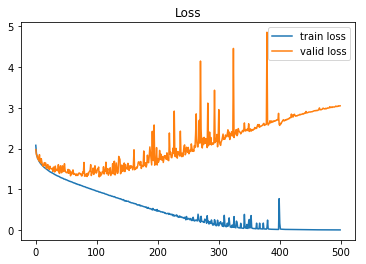

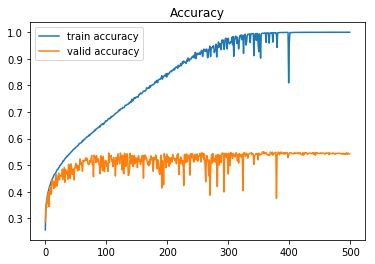

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()